# Plots of the loss and the accuracy

In [13]:
import torch
import matplotlib.pyplot as plt
import re
import numpy as np

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


## Loss and Accuracy values of every 50th batch for the first two epochs

In [14]:
def load_data(file):
    loss_regex = r"tensor\(\[(?P<loss>\d*\.\d*)\]"
    accuracy_regex = r"tensor\((?P<accuracy>\d*\.\d*)"
    with open(file, 'r') as f:
        results = f.read()
        losses = [float(loss.group('loss')) for loss in re.finditer(loss_regex, results) if loss]
        accuracies = [float(accuracy.group('accuracy')) for accuracy in re.finditer(accuracy_regex, results) if accuracy]

    return losses, accuracies

def running_average(window_size, data):
    average_data = []
    for ind in range(len(data) - window_size + 1):
        average_data.append(np.mean(data[ind:ind+window_size]))
    for ind in range(window_size - 1):
        average_data.insert(0, np.nan)
    return average_data

In [15]:
losses, accuracies = load_data('./loss_accuracy_data.txt')
average_loss = running_average(25,losses)
average_accuracy = running_average(25, accuracies)

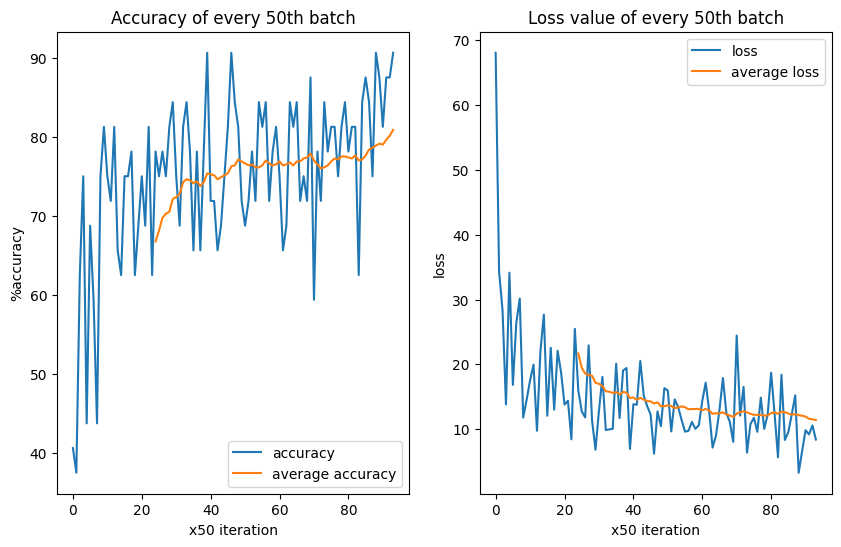

In [29]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('Accuracy of every 50th batch')
plt.plot(accuracies, label='accuracy')
plt.plot(average_accuracy, label='average accuracy')
plt.ylabel('%accuracy')
plt.xlabel('x50 iteration')
plt.legend()
plt.subplot(1,2,2)
plt.title('Loss value of every 50th batch')
plt.plot(losses, label='loss')
plt.plot(average_loss, label='average loss')
plt.ylabel('loss')
plt.xlabel('x50 iteration')
plt.legend();

## Detailed plots of the second epoch

In [32]:
checkpoint = torch.load('trainedmodelsymbols.tar', map_location=torch.device(device))
losses = checkpoint['losses']
accuracies = checkpoint['accuracies']

In [33]:
average_loss = running_average(25,losses)
average_accuracy = running_average(25, accuracies)

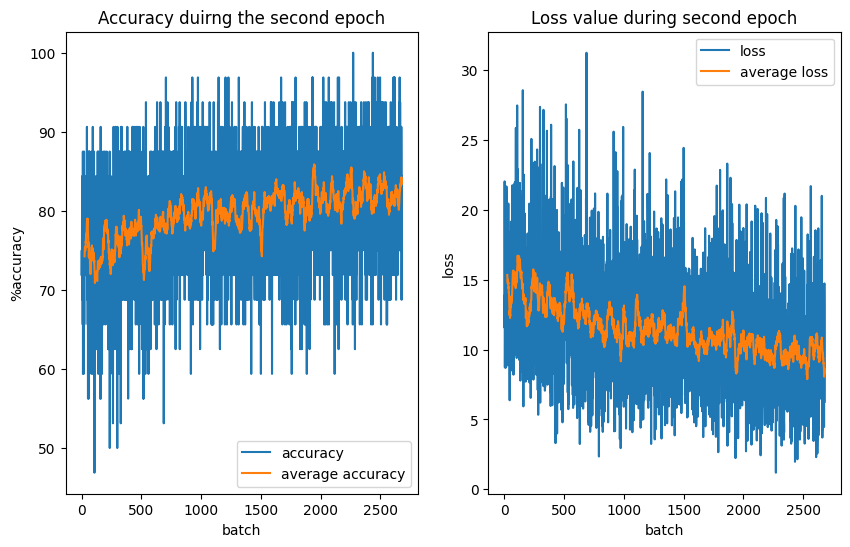

In [35]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('Accuracy duirng the second epoch')
plt.plot(accuracies, label='accuracy')
plt.plot(average_accuracy, label='average accuracy')
plt.ylabel('%accuracy')
plt.xlabel('batch')
plt.legend()
plt.subplot(1,2,2)
plt.title('Loss value during second epoch')
plt.plot(losses, label='loss')
plt.plot(average_loss, label='average loss')
plt.ylabel('loss')
plt.xlabel('batch')
plt.legend();